In [17]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.inspection import DecisionBoundaryDisplay


The vectors: (1, 0), (2, 3), (2, -2) form class A and (4, 1), (5, -3) are from class
B. 

Find the best hyperplane that separates the classes. 

Which vectors do support the hyperplane? 

What is the margin (the distance between classes)?

Hint: You do not need to run SVM. You can solve it by drawing the points and
looking at the graph.

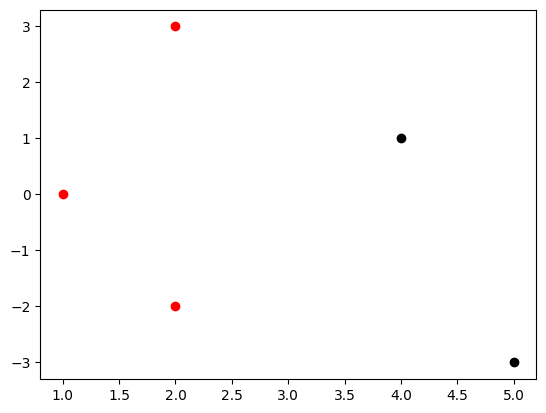

In [18]:
class_A = [np.array([1,0]), np.array([2,3]), np.array([2,-2])]
class_B = [np.array([4,1]), np.array([5,-3])]

x,y = zip(*class_A)
plt.scatter(x, y, c='red')
x,y = zip(*class_B)
plt.scatter(x, y, c='black')

plt.show()

In [19]:
cla = SVC(kernel='linear')
X = np.vstack([class_A, class_B])
y = [0, 0, 0, 1, 1]

cla.fit(X,y)

n = cla.coef_
d = -cla.intercept_

print('margin:', 1 / np.sqrt(np.sum(cla.coef_ ** 2)), n)
print('support_vectors:', cla.support_vectors_)

margin: 1.0001181335524212 [[9.99881877e-01 7.87484664e-05]]
support_vectors: [[ 2.  3.]
 [ 2. -2.]
 [ 4.  1.]]


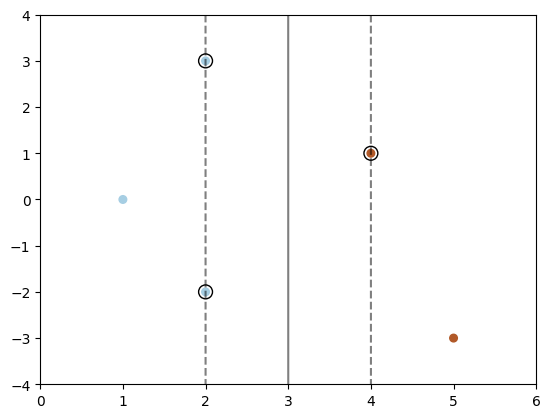

In [20]:
# fit the model, don't regularize for illustration purposes
clf = SVC(kernel="linear", C=1000)
clf.fit(X, y)

plt.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap=plt.cm.Paired)

# plot the decision function
ax = plt.gca()
DecisionBoundaryDisplay.from_estimator(
    clf,
    X,
    plot_method="contour",
    colors="k",
    levels=[-1, 0, 1],
    alpha=0.5,
    linestyles=["--", "-", "--"],
    ax=ax,
)
# plot support vectors
ax.scatter(
    clf.support_vectors_[:, 0],
    clf.support_vectors_[:, 1],
    s=100,
    linewidth=1,
    facecolors="none",
    edgecolors="k",
)
plt.show()